# 1. Install and import required packages

In [1]:
!pip install biopython

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [2]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline
from matplotlib.patches import Patch

# 2. Import Multiple Sequence Alignment

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2.1 Human sequences

In [4]:
alignment_human = AlignIO.read("/content/drive/My Drive/DSinLS20/week11/code/input/large_dataset_alignment.fasta", "fasta")
print(alignment_human)

SingleLetterAlphabet() alignment with 48 rows and 29929 columns
--------------------------------------------...--- gb|MT584996.1
--------------------------------------------...--- gb|MT612152.1
-------------------ACCTT---CCCAGGTAACAAACCAA...--- gb|MT449673.1
--------------------------------------------...--- gb|MT612155.1
--------------------------------------------...--- gb|MT612153.1
--------------------------------------------...--- gb|MT582452.1
------------------CACCTT---CCCAGGTAACAAACCAA...--- gb|MT449662.1
----------------------------------AACAAACCAA...--- gb|MT528238.1
--------------------------------------------...--- gb|MT528235.1
----------------------------------AACAAACCAA...--- gb|MT566435.1
----------------------------------AACAAACCAA...--- gb|MT566436.1
---------GTTGGTTTATACCTT---CCCAGGTAACAAACCAA...--- gb|MT079847.1
----------TGTGTTTTCTCGTTGAAACCAGGTAACAAACCAA...--- gb|MT079848.1
CGAAAGTTGGTTGGTTTGTTACCT---GGGAAGGTATAAACCAA...--- gb|MT079846.1
--------------------------

## 2.2 Sequences from different hosts

In [5]:
alignment_different_hosts = AlignIO.read("/content/drive/My Drive/DSinLS20/week11/code/input/alignment_different_hosts.fasta", "fasta")
print(alignment_different_hosts)

SingleLetterAlphabet() alignment with 7 rows and 33063 columns
--------------------------------------------...--- KX389094
--------------------------------------------...--- JQ065048
--------------------------------------------...--- NC_019843
--------------------------------------------...--- MN996528
--------------------------------------------...AAA MG772934
AGAAACAAGTAGTGTTTTAAAAACCTTCAAATTAGTGCCTGTAA...--- NC_034972
--------------------------------------------...--- MT084071


# 3. Distance calculation

In [6]:
calculator = DistanceCalculator('identity')

## 3.1 Human sequences

In [7]:
dm_human = calculator.get_distance(alignment_human)
print(dm_human)

gb|MT584996.1	0
gb|MT612152.1	0.0351832670653881	0
gb|MT449673.1	0.03000434361321791	0.023823047879982573	0
gb|MT612155.1	0.025025894617260902	0.010625146179291	0.013598850613117719	0
gb|MT612153.1	0.023923285108089165	0.012462828694577155	0.012095292191519946	0.005045273814694773	0
gb|MT582452.1	0.023221624511343464	0.01690667914063282	0.011861405325938046	0.006816131511243273	0.005646697183333882	0
gb|MT449662.1	0.02328844933008123	0.017040328778108238	0.008353102342209873	0.006816131511243273	0.0053125730896455	0.0050786862240636	0
gb|MT528238.1	0.022185839820909492	0.0159377192689365	0.009355474623275128	0.005713522002071536	0.004477262855424491	0.003976076714891863	0.0025727555214006825	0
gb|MT528235.1	0.021551004042901556	0.015403120719035046	0.009756423535701164	0.005245748270907846	0.004009489124260801	0.0033078285275151	0.0029737044338267182	0.0018710949246549813	0
gb|MT566435.1	0.021784890908483456	0.0154699455377727	0.00922182498579971	0.0053125730896455	0.004143138761736109

## 3.2 Sequences from different hosts

In [8]:
dm_different_hosts = calculator.get_distance(alignment_different_hosts)
print(dm_different_hosts)

KX389094	0
JQ065048	0.4881287239512446	0
NC_019843	0.584853159120467	0.6193025436288297	0
MN996528	0.5639839095060944	0.6044218612951033	0.489610743126758	0
MG772934	0.5663127967819013	0.6074161449354263	0.4941475365211868	0.11414572180382909	0
NC_034972	0.6187581284214984	0.6322777727368962	0.5997943320327859	0.5639536642167982	0.5639839095060944	0
MT084071	0.586274687717388	0.6130720140338142	0.5378822248434807	0.21610259202129267	0.24084323866557789	0.502827934549194	0
	KX389094	JQ065048	NC_019843	MN996528	MG772934	NC_034972	MT084071


# 4. Create the Phylogenetic Tree using

# 4.1 UPGMA

In [9]:
constructor = DistanceTreeConstructor()

# 4.1.1 Human sequences

In [10]:
metadata_human = pd.read_csv("/content/drive/My Drive/DSinLS20/week11/code/input/large_dataset_metadata.csv")
metadata_human

,Accession,Length,Geo_Location,Host,Collection_Date,Continent
0,NC_045512,29903,China,Homo sapiens,2019-12,Asia
1,MT093631,29860,China,Homo sapiens,2020-01-08,Asia
2,MT079846,29903,China,Homo sapiens,2020-01-22,Asia
3,MT079847,29872,China,Homo sapiens,2020-01-22,Asia
4,MT079848,29880,China,Homo sapiens,2020-01-22,Asia
5,MT510728,29903,China,Homo sapiens,2020-02-13,Asia
6,MT582452,29782,Germany: Dusseldorf,Homo sapiens,2020-03-23,Europe
7,MT527184,29834,Italy: Lazio,Homo sapiens,2020-03-23,Europe
8,MT528235,29818,Italy: Lazio,Homo sapiens,2020-03-23,Europe
9,MT528238,29834,Italy: Lazio,Homo sapiens,2020-03-23,Europe


In [11]:
codes_human = []
names_human = []

for index, row in metadata_human.iterrows():
    acc_no = row['Accession']

    if acc_no=='NC_045512':
      new_code = 'ref|' + acc_no + '.2'
    elif acc_no=='MT093631':
      new_code = 'gb|' + acc_no + '.2'
    elif acc_no in ['LC556316', 'LC556317', 'LC556315']:
      new_code = 'dbj|' + acc_no + '.1'

    else:
      new_code = 'gb|' + acc_no + '.1'
    new_name =  '   '+ acc_no + ' | ' + row['Geo_Location'] + ' | ' + row['Collection_Date']
    codes_human.append(new_code)
    names_human.append(new_name)

In [12]:
print(codes_human)

['ref|NC_045512.2', 'gb|MT093631.2', 'gb|MT079846.1', 'gb|MT079847.1', 'gb|MT079848.1', 'gb|MT510728.1', 'gb|MT582452.1', 'gb|MT527184.1', 'gb|MT528235.1', 'gb|MT528238.1', 'gb|MT407655.1', 'gb|MT407656.1', 'gb|MT407657.1', 'gb|MT675956.1', 'gb|MT670023.1', 'gb|MT655132.1', 'gb|MT655135.1', 'gb|MT517420.1', 'gb|MT517421.1', 'gb|MT517429.1', 'gb|MT459837.1', 'gb|MT459841.1', 'gb|MT459896.1', 'dbj|LC556315.1', 'dbj|LC556316.1', 'dbj|LC556317.1', 'gb|MT511066.1', 'gb|MT511073.1', 'gb|MT511082.1', 'gb|MT622321.1', 'gb|MT628211.1', 'gb|MT449662.1', 'gb|MT449673.1', 'gb|MT584996.1', 'gb|MT584997.1', 'gb|MT584998.1', 'gb|MT566435.1', 'gb|MT566436.1', 'gb|MT566437.1', 'gb|MT612152.1', 'gb|MT612153.1', 'gb|MT612155.1', 'gb|MT679167.1', 'gb|MT679168.1', 'gb|MT679169.1', 'gb|MT510690.1', 'gb|MT510691.1', 'gb|MT510692.1']


In [13]:
print(names_human)

['   NC_045512 | China | 2019-12', '   MT093631 | China | 2020-01-08', '   MT079846 | China | 2020-01-22', '   MT079847 | China | 2020-01-22', '   MT079848 | China | 2020-01-22', '   MT510728 | China | 2020-02-13', '   MT582452 | Germany: Dusseldorf | 2020-03-23', '   MT527184 | Italy: Lazio | 2020-03-23', '   MT528235 | Italy: Lazio | 2020-03-23', '   MT528238 | Italy: Lazio | 2020-03-23', '   MT407655 | China: Zhejiang | 2020-03-24', '   MT407656 | China: Zhejiang | 2020-03-24', '   MT407657 | China: Zhejiang | 2020-03-24', '   MT675956 | Turkey | 2020-03-27', '   MT670023 | Chile | 2020-03-27', '   MT655132 | Spain: Donostia-San Sebatian | 2020-03-27', '   MT655135 | Spain: Donostia-San Sebatian | 2020-03-27', '   MT517420 | Czech Republic | 2020-03-27', '   MT517421 | Czech Republic | 2020-03-27', '   MT517429 | Czech Republic | 2020-03-27', '   MT459837 | Greece: Athens | 2020-03-29', '   MT459841 | Greece: Athens | 2020-03-29', '   MT459896 | Greece: Athens | 2020-03-29', '   LC5

In [14]:
def get_label_human(leaf):    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:  
        for i in range(0, len(codes_human)):
            if leaf.name==codes_human[i]:
                name=names_human[i]
                return name

In [15]:
tree_human = constructor.upgma(dm_human) 

In [16]:
# clades_human = tree_human.find_clades(order='level')
# print(clades_human)

In [17]:
# from Bio.Phylo.Consensus import _clade_to_bitstr

# def color_clades_of_tree(clade_list):
#   for clade_x in clade_list:
#     terminals = clade_x.get_terminals()

#     asia = 0
#     europe = 0
#     north_america = 0
#     south_america = 0
#     africa = 0
#     australia = 0

#     for endnode in terminals:
#       sample = str(endnode)
#       acc_no = sample.split('|')[1].split('.')[0]
#       row = metadata_human.loc[metadata_human['Accession'] == acc_no]
#       continent = row['Continent'].values[0]


#       if continent == 'Asia':
#         asia += 1
#       elif continent == 'Europe':
#         europe += 1
#       elif continent == 'North America':
#         north_america += 1
#       elif continent == 'South America':
#         south_america += 1
#       elif continent == 'Africa':
#         africa += 1
#       elif continent == 'Australia':
#         australia += 1

#     max_samples_of_continent = max([asia, europe, north_america, south_america, africa, australia])

#     print(clade_x)

#     tree_term_names = [term.name for term in tree_human.get_terminals()]
#     bitstr = _clade_to_bitstr(clade_x, tree_term_names)
#     print(bitstr)

#     bit_list = []
#     for i in range(0, len(bitstr)):
#       bit_list.append(int(bitstr[i]))

#     print(bit_list)


#     if asia == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'red'
#       print('In Asian case:', clade_x)
#     elif europe == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'green'
#       print('In European case:', clade_x)
#     elif north_america == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'blue'
#       print('In North American case:', clade_x)
#     elif south_america == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'pink'
#       print('In South American case:', clade_x)
#     elif australia == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'purple'
#       print('In Australia case:', clade_x)
#     elif africa == max_samples_of_continent:
#       tree_human.clade[bit_list].color = 'brown'
#       print('In Africa case:', clade_x)

In [18]:
# color_clades_of_tree(clades_human)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

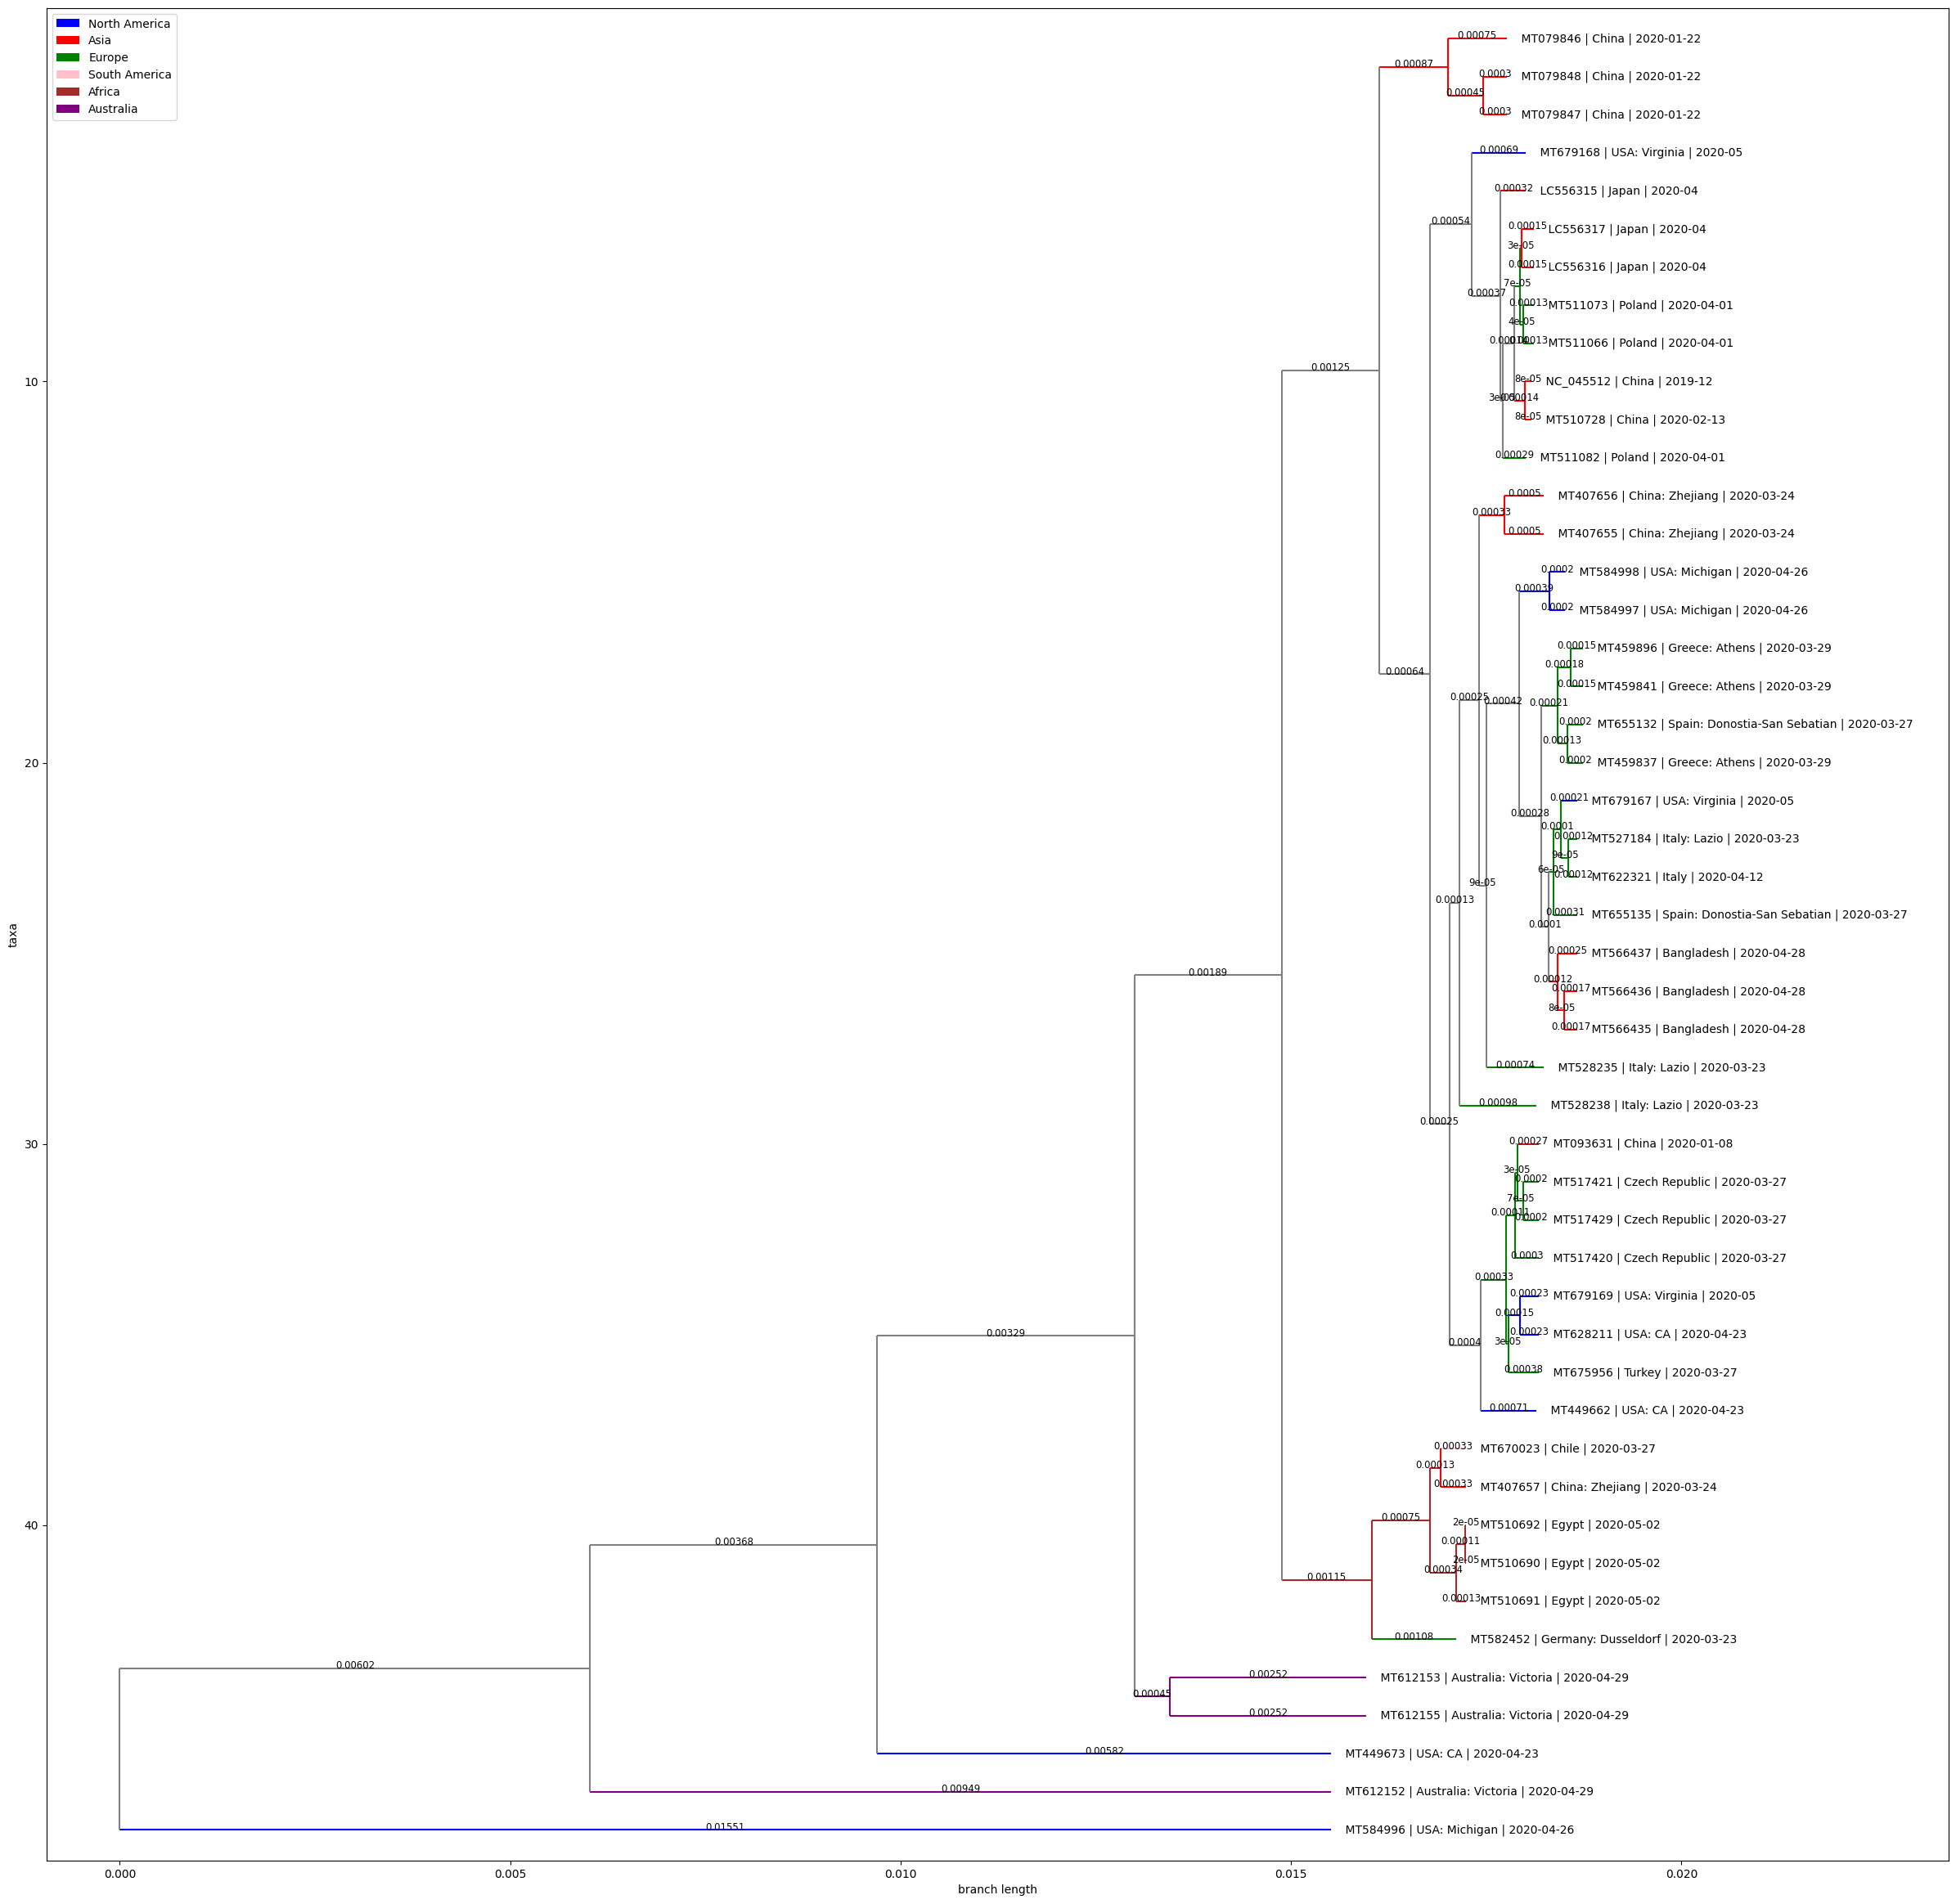

In [43]:
#tree_human.rooted = True
fig = plt.figure(figsize=(30, 30), dpi=100)
axes = fig.add_subplot(1, 1, 1)
tree_human.root.color = "grey"
#Asia_human = tree_human.common_ancestor({'name':'ref|NC_045512.2'},{'name':'ref|MT093631.2'}, {'name':'gb|MT079846.1'}, {'name':'gb|MT079847.1'}, {'name':'gb|MT079848.1'}, {'name':'gb|MT510728.1'}, {'name':'gb|MT407655.1'},{'name':'gb|MT407656.1'}, {'name':'gb|MT407657.1'}, {'name':'gb|LC556315.1'}, {'name':'gb|LC556316.1'}, {'name':'gb|LC556317.1'}, {'name':'gb|MT566435.1'}, {'name':'gb|MT566436.1'}, {'name':'gb|MT566437.1'}, {'name':'gb|MT675956.1'})
#Asia_human.color = "red"
tree_human.clade[1].color = "blue"
tree_human.clade[0,1].color = "purple"
tree_human.clade[0,0,1].color = "blue"
tree_human.clade[0,0,0,1].color = "purple"
tree_human.clade[0,0,0,0,1].color = "brown"
tree_human.clade[0,0,0,0,1,1].color = "green"
tree_human.clade[0,0,0,0,1,0,0].color = "red"
tree_human.clade[0,0,0,0,1,0,0,0].color = "pink"
tree_human.clade[0,0,0,0,0,1,1,0,1].color = "green"
tree_human.clade[0,0,0,0,0,1,1,1,0].color = "green"
tree_human.clade[0,0,0,0,0,1,0,1,1,1].color = "green"
tree_human.clade[0,0,0,0,0,1,0,1,1,0,0].color = "green"
tree_human.clade[0,0,0,0,0,1,0,1,1,0,1].color = "red"
tree_human.clade[0,0,0,0,0,1,1,1,0,1,1].color = "green"
tree_human.clade[0,0,0,0,0,1,1,1,0,1,0].color = "blue"
tree_human.clade[0,0,0,0,0,1,1,1,0,1,1].color = "green"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,0,1,0].color = "green"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,0,1,1,1].color = "red"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,0,1,1,0].color = "green"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0].color = "blue"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,1].color = "green"
tree_human.clade[0,0,0,0,0,1,0,1,1,0,0,0].color = "red"
tree_human.clade[0,0,0,0,0,1,1,1,0,0,0,0].color = "red"
tree_human.clade[0,0,0,0,0,1,1,0,0,1,0,0].color="blue"
tree_human.clade[0,0,0,0,0,1,1,0,0,0].color="red"
tree_human.clade[0,0,0,0,0,1,1,1,1].color="blue"
tree_human.clade[0,0,0,0,0,0].color="red"
tree_human.clade[0,0,0,0,0,1,0,1,0].color="red"
tree_human.clade[0,0,0,0,0,1,0,0].color="blue"
legend_elements = (Patch(facecolor='blue', label='North America'), Patch(facecolor='red', label='Asia'), Patch(facecolor='green', label='Europe'), Patch(facecolor='pink', label='South America'), Patch(facecolor='brown', label='Africa'), Patch(facecolor='purple', label='Australia'))
axes.legend(handles=legend_elements, loc='upper left')
Phylo.draw(tree_human, axes=axes, label_func=get_label_human, branch_labels=lambda c: round(c.branch_length, 5), do_show=False)
plt.savefig("/content/drive/My Drive/DSinLS20/week11/code/output/phylogenetic_tree_large_dataset.png")
from google.colab import files
files.download("/content/drive/My Drive/DSinLS20/week11/code/output/phylogenetic_tree_large_dataset.png")


# 4.1.2 Sequences from different hosts

In [20]:
def get_label_different_hosts(leaf):
    code=['JQ065048', 'MN996528', 'NC_034972', 'NC_019843', 'KX389094', 'MG772934', 'MT084071']
    host=['Wigeon', 'H. Sapiens, COVID-19', 'Rodent', 'H. Sapiens, MERS', 'Red junglefowl', 'Horseshoe bat', 'Pangolin']
    
    if leaf.name.startswith('Inner'):
        name=''
        return name
    else:  
        for i in range(0, len(code)):
            if leaf.name==code[i]:
                name=host[i]
                return name

In [21]:
tree_different_hosts = constructor.upgma(dm_different_hosts) 

In [22]:
tree_different_hosts.root.color = "grey"
mrca_different_hosts = tree_different_hosts.common_ancestor({'name':  'MG772934'}, {'name': 'MN996528'})
mrca_different_hosts.color = "red"

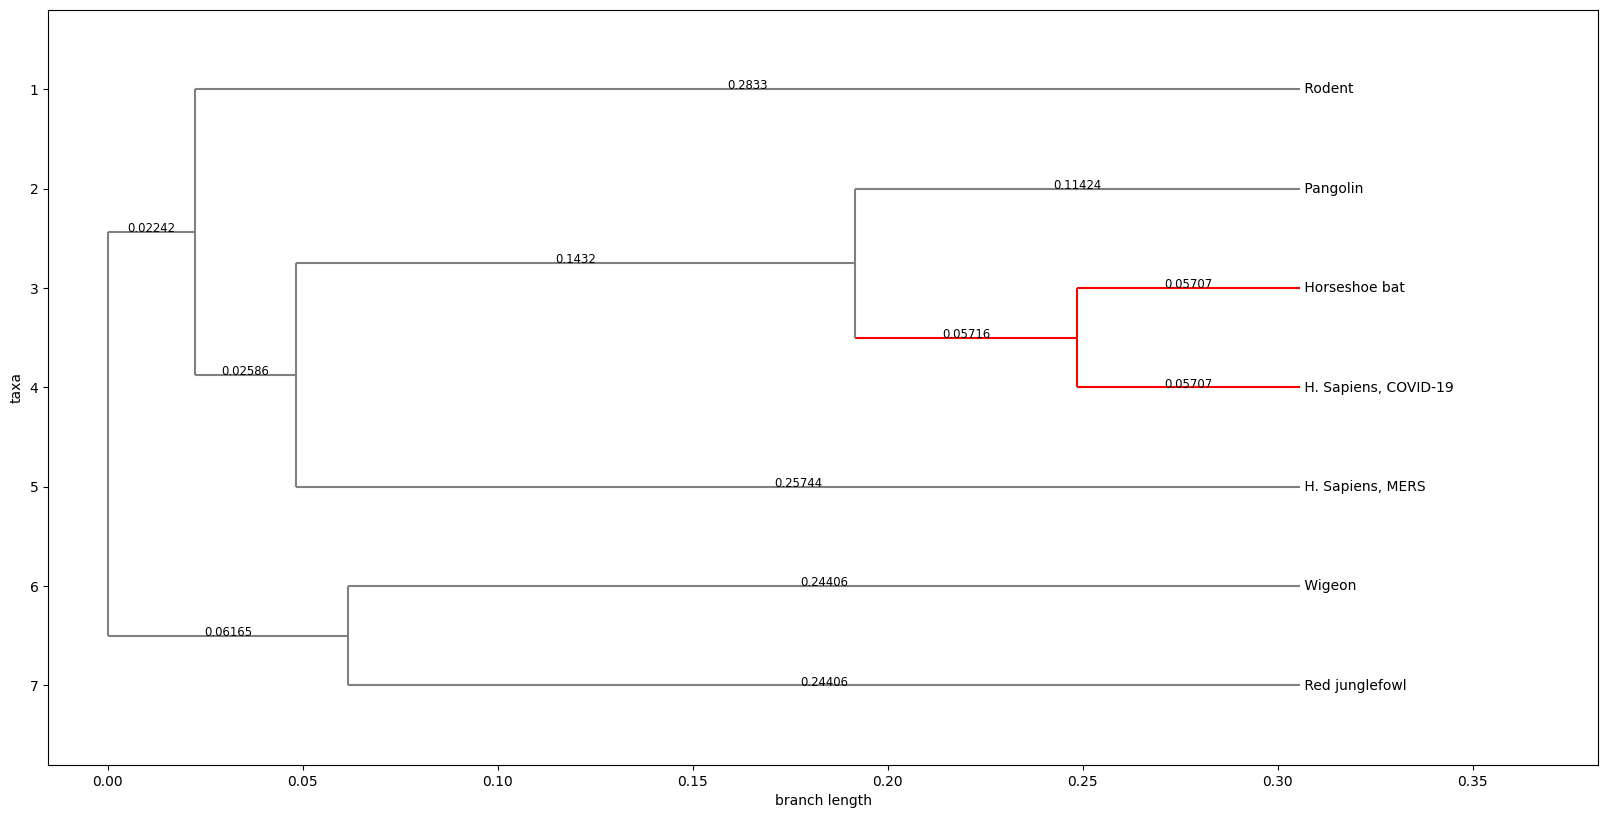

In [23]:
fig = plt.figure(figsize=(20, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_different_hosts, axes=axes, label_func=get_label_different_hosts, branch_labels=lambda c: round(c.branch_length,5), do_show=False)
plt.savefig("/content/drive/My Drive/DSinLS20/week11/code/output/phylogenetic_tree_different_hosts.png")

# 5. 2D Graphical Representation of DNA Sequences

In [24]:
import math
from Bio import SeqIO
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [25]:
# Parameters
m = 0.5
n= 3/4

In [26]:
def data_point_from_sequence(seq):

  A_count = 0
  C_count = 0
  G_count = 0
  T_count = 0

  x_coordinates = []
  y_coordinates = []

  for i in range(0, len(seq)):
    base = seq[i]
    if base == 'A':
      A_count += 1
    elif base == 'C':
      C_count += 1
    elif base == 'G':
      G_count += 1
    elif base == 'T':
      T_count += 1

    xi = A_count*m + G_count*math.sqrt(n) + C_count*math.sqrt(n) + T_count*m
    yi = -A_count*math.sqrt(n) - G_count*m + C_count*m + T_count*math.sqrt(n)

    x_coordinates.append(xi)
    y_coordinates.append(yi)

  return(x_coordinates, y_coordinates)

## 5.1 Human sequences

### 5.1.1 Import Seqs

In [27]:
seq_names_human = []
seqs_human = []
for index, record in enumerate(SeqIO.parse("/content/drive/My Drive/DSinLS20/week11/code/input/large_dataset_sequences.fasta","fasta")):
  seq_names_human.append(record.id)
  seqs_human.append(record.seq)

In [28]:
print(seq_names_human)

['NC_045512.2', 'MT093631.2', 'MT079846.1', 'MT079847.1', 'MT079848.1', 'MT510728.1', 'MT582452.1', 'MT527184.1', 'MT528235.1', 'MT528238.1', 'MT407655.1', 'MT407656.1', 'MT407657.1', 'MT675956.1', 'MT670023.1', 'MT655132.1', 'MT655135.1', 'MT517420.1', 'MT517421.1', 'MT517429.1', 'MT459837.1', 'MT459841.1', 'MT459896.1', 'LC556315.1', 'LC556316.1', 'LC556317.1', 'MT511066.1', 'MT511073.1', 'MT511082.1', 'MT622321.1', 'MT628211.1', 'MT449662.1', 'MT449673.1', 'MT584996.1', 'MT584997.1', 'MT584998.1', 'MT566435.1', 'MT566436.1', 'MT566437.1', 'MT612152.1', 'MT612153.1', 'MT612155.1', 'MT679167.1', 'MT679168.1', 'MT679169.1', 'MT510690.1', 'MT510691.1', 'MT510692.1']


In [29]:
print(seqs_human)

[Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), Seq('ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...AAA', SingleLetterAlphabet()), Seq('CGAAAGTTGGTTGGTTTGTTACCTGGGAAGGTATAAACCAACCAACTTTCGATC...AAG', SingleLetterAlphabet()), Seq('GTTGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGA...GTT', SingleLetterAlphabet()), Seq('TGTGTTTTCTCGTTGAAACCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA...AGA', SingleLetterAlphabet()), Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TCC', SingleLetterAlphabet()), Seq('AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...CTT', SingleLetterAlphabet()), Seq('TTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...CTT', SingleLetterAlphabet()), Seq('AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTA...CTT', SingleLetterAlphabet()), Seq('TCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGG...AGA', S

### 5.1.2 Calculate data points

In [30]:
data_points_human_seqs = []
df_human_coordinates = pd.DataFrame()
i = 0
for seq in seqs_human:
  x_coordinates, y_coordinates = data_point_from_sequence(seq)
  data_points_human_seqs.append([x_coordinates, y_coordinates])
  x_column_name = 'x_' + seq_names_human[i] 
  y_column_name = 'y_' + seq_names_human[i] 
  new_df = pd.DataFrame({x_column_name: x_coordinates, y_column_name: y_coordinates})
  df_human_coordinates = pd.concat([df_human_coordinates, new_df], axis=1)
  i += 1

print(df_human_coordinates)
df_human_coordinates.to_pickle("/content/drive/My Drive/DSinLS20/week11/code/output/df_human_coordinates.pkl")

       x_NC_045512.2  y_NC_045512.2  ...  x_MT510692.1  y_MT510692.1
0            0.50000      -0.866025  ...      0.866025     -0.500000
1            1.00000       0.000000  ...      1.366025      0.366025
2            1.50000       0.866025  ...      1.866025      1.232051
3            2.00000       0.000000  ...      2.732051      1.732051
4            2.50000      -0.866025  ...      3.232051      2.598076
...              ...            ...  ...           ...           ...
29898    19105.71846     372.220360  ...           NaN           NaN
29899    19106.21846     371.354335  ...           NaN           NaN
29900    19106.71846     370.488309  ...           NaN           NaN
29901    19107.21846     369.622284  ...           NaN           NaN
29902    19107.71846     368.756258  ...           NaN           NaN

[29903 rows x 96 columns]


### 5.1.3 Plot figures

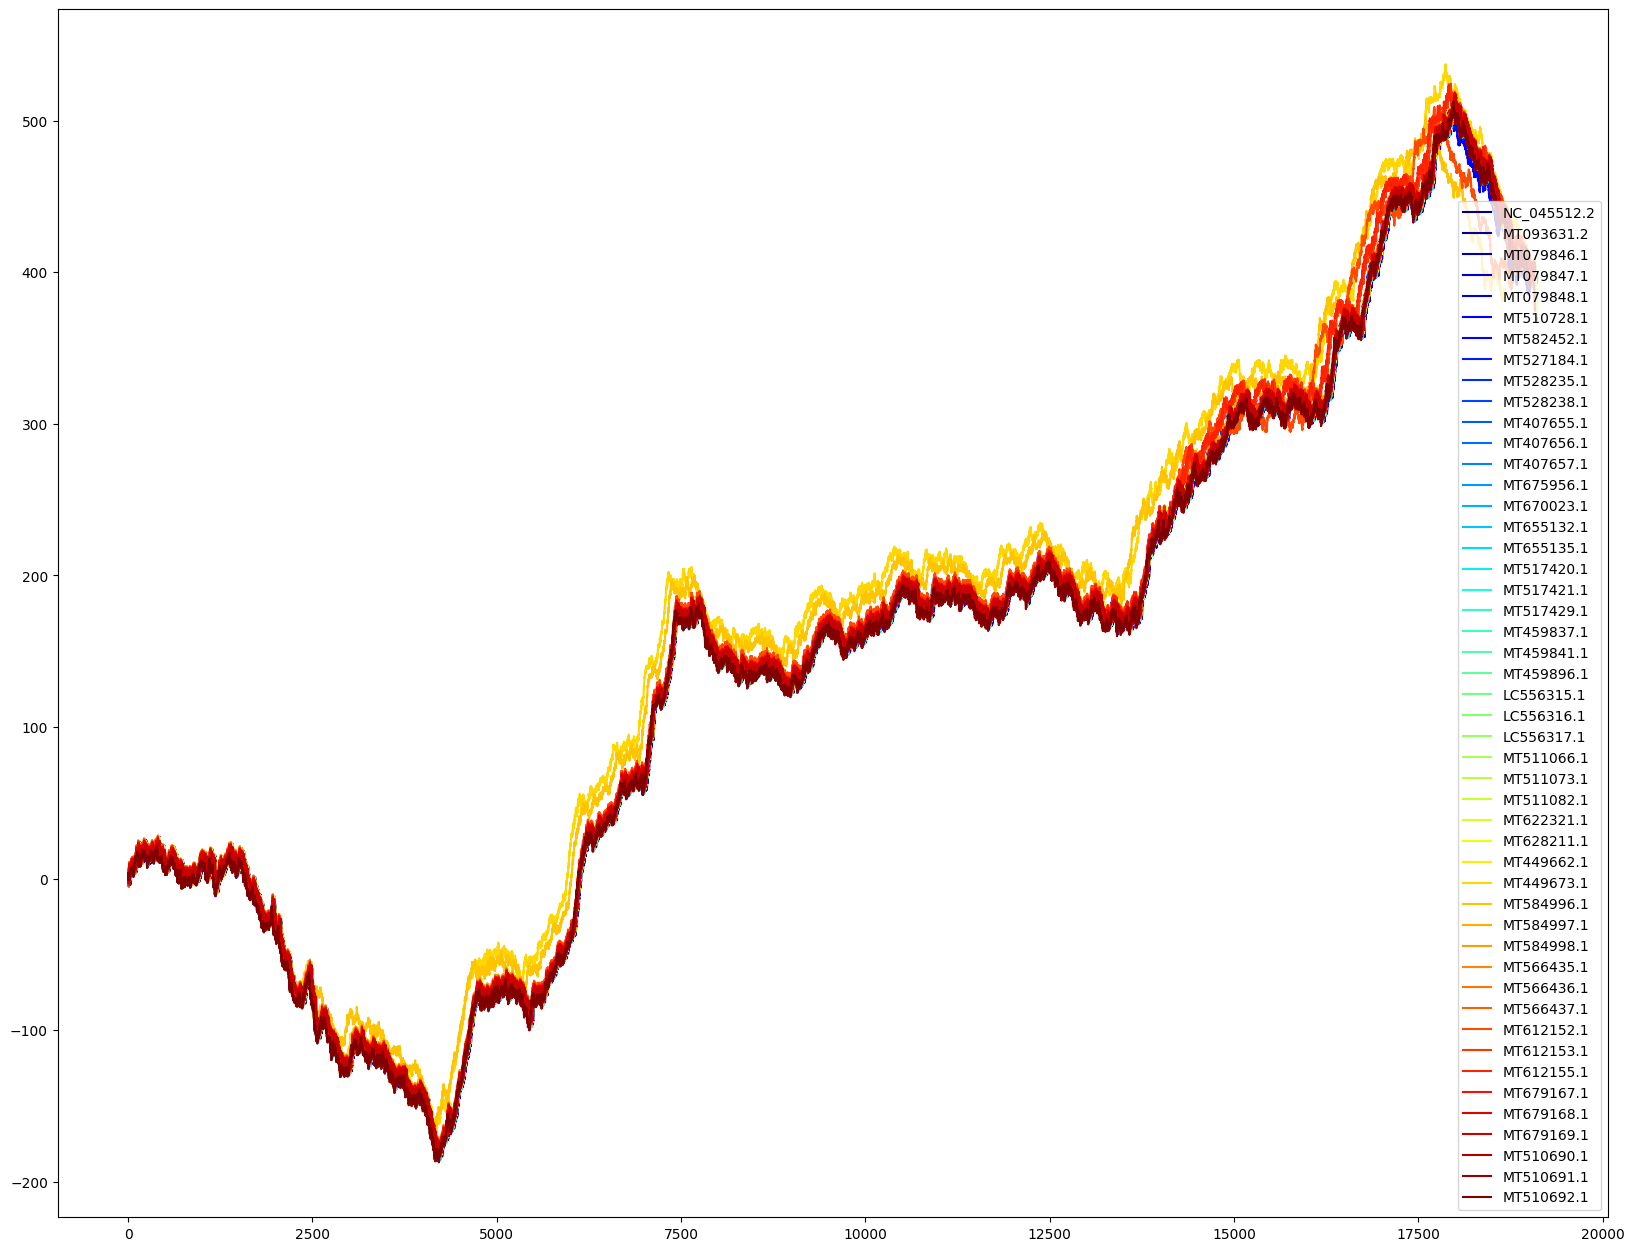

<Figure size 432x288 with 0 Axes>

In [31]:
n = len(seq_names_human)
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, n))
figure(figsize=(20,16), dpi=100)

for seq_name, color in zip(seq_names_human, colors):
  x_column_name = 'x_' + seq_name
  y_column_name = 'y_' + seq_name
  x_vector = df_human_coordinates[x_column_name]
  y_vector = df_human_coordinates[y_column_name]
  plt.plot(x_vector, y_vector, label=seq_name, color=color)
plt.legend(loc = 'best')
plt.show()
plt.savefig("/content/drive/My Drive/DSinLS20/week11/code/output/2D_curves_large_dataset.png")

## 5.2 Sequences from different hosts

### 5.2.1 Import Seqs

In [32]:
seq_names_different_hosts = []
seqs_different_hosts = []
for index, record in enumerate(SeqIO.parse("/content/drive/My Drive/DSinLS20/week11/code/input/different_hosts_sequences.fasta","fasta")):
  seq_names_different_hosts.append(record.id)
  seqs_different_hosts.append(record.seq)

In [33]:
print(seq_names_different_hosts)

['KX389094', 'MN996528', 'MG772934', 'JQ065048', 'NC_019843', 'NC_034972', 'MT084071']


In [34]:
print(seqs_different_hosts)

[Seq('ACTGAAAATAGATATTAATATATATCTATTGCACTAGCCTTGCGCTAGATTTCT...AAA', SingleLetterAlphabet()), Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), Seq('ATATTAGGTTTTTACCTTCCCAGGTAACAAACCAACTAACTCTCGATCTCTTGT...AAA', SingleLetterAlphabet()), Seq('GTCATTTGGTAAAATATAATATATATTTTATCACTCTAGCTTCGCTAGAAACCT...AAA', SingleLetterAlphabet()), Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA', SingleLetterAlphabet()), Seq('AGAAACAAGTAGTGTTTTAAAAACCTTCAAATTAGTGCCTGTAACATCTTTGCA...AAA', SingleLetterAlphabet()), Seq('CACGCAGTATAATTAATANNNNNNNNCTGTCGTTGACAGGACACGAGTAACTCG...CGA', SingleLetterAlphabet())]


### 5.2.2 Calculate data points

In [35]:
data_points_different_hosts = []
df_different_hosts_coordinates = pd.DataFrame()
i = 0
for seq in seqs_different_hosts:
  x_coordinates, y_coordinates = data_point_from_sequence(seq)
  data_points_different_hosts.append([x_coordinates, y_coordinates])
  x_column_name = 'x_' + seq_names_different_hosts[i] 
  y_column_name = 'y_' + seq_names_different_hosts[i] 
  new_df = pd.DataFrame({x_column_name: x_coordinates, y_column_name: y_coordinates})
  df_different_hosts_coordinates = pd.concat([df_different_hosts_coordinates, new_df], axis=1)
  i += 1

print(df_different_hosts_coordinates)
df_different_hosts_coordinates.to_pickle("/content/drive/My Drive/DSinLS20/week11/code/output/df_different_hosts_coordinates.pkl")

       x_KX389094  y_KX389094  x_MN996528  ...  y_NC_034972  x_MT084071  y_MT084071
0        0.500000   -6.928203         0.5  ...    -6.928203    6.928203    0.500000
1        7.428203   -6.428203         1.0  ...    -7.428203    7.428203   -6.428203
2        7.928203    0.500000         1.5  ...   -14.356406   14.356406   -5.928203
3       14.856406    0.000000         2.0  ...   -21.284610   21.284610   -6.428203
4       15.356406   -6.928203         2.5  ...   -28.212813   28.212813   -5.928203
...           ...         ...         ...  ...          ...         ...         ...
30114         NaN         NaN         NaN  ...          NaN         NaN         NaN
30115         NaN         NaN         NaN  ...          NaN         NaN         NaN
30116         NaN         NaN         NaN  ...          NaN         NaN         NaN
30117         NaN         NaN         NaN  ...          NaN         NaN         NaN
30118         NaN         NaN         NaN  ...          NaN         NaN     

### 5.1.3 Plot figures

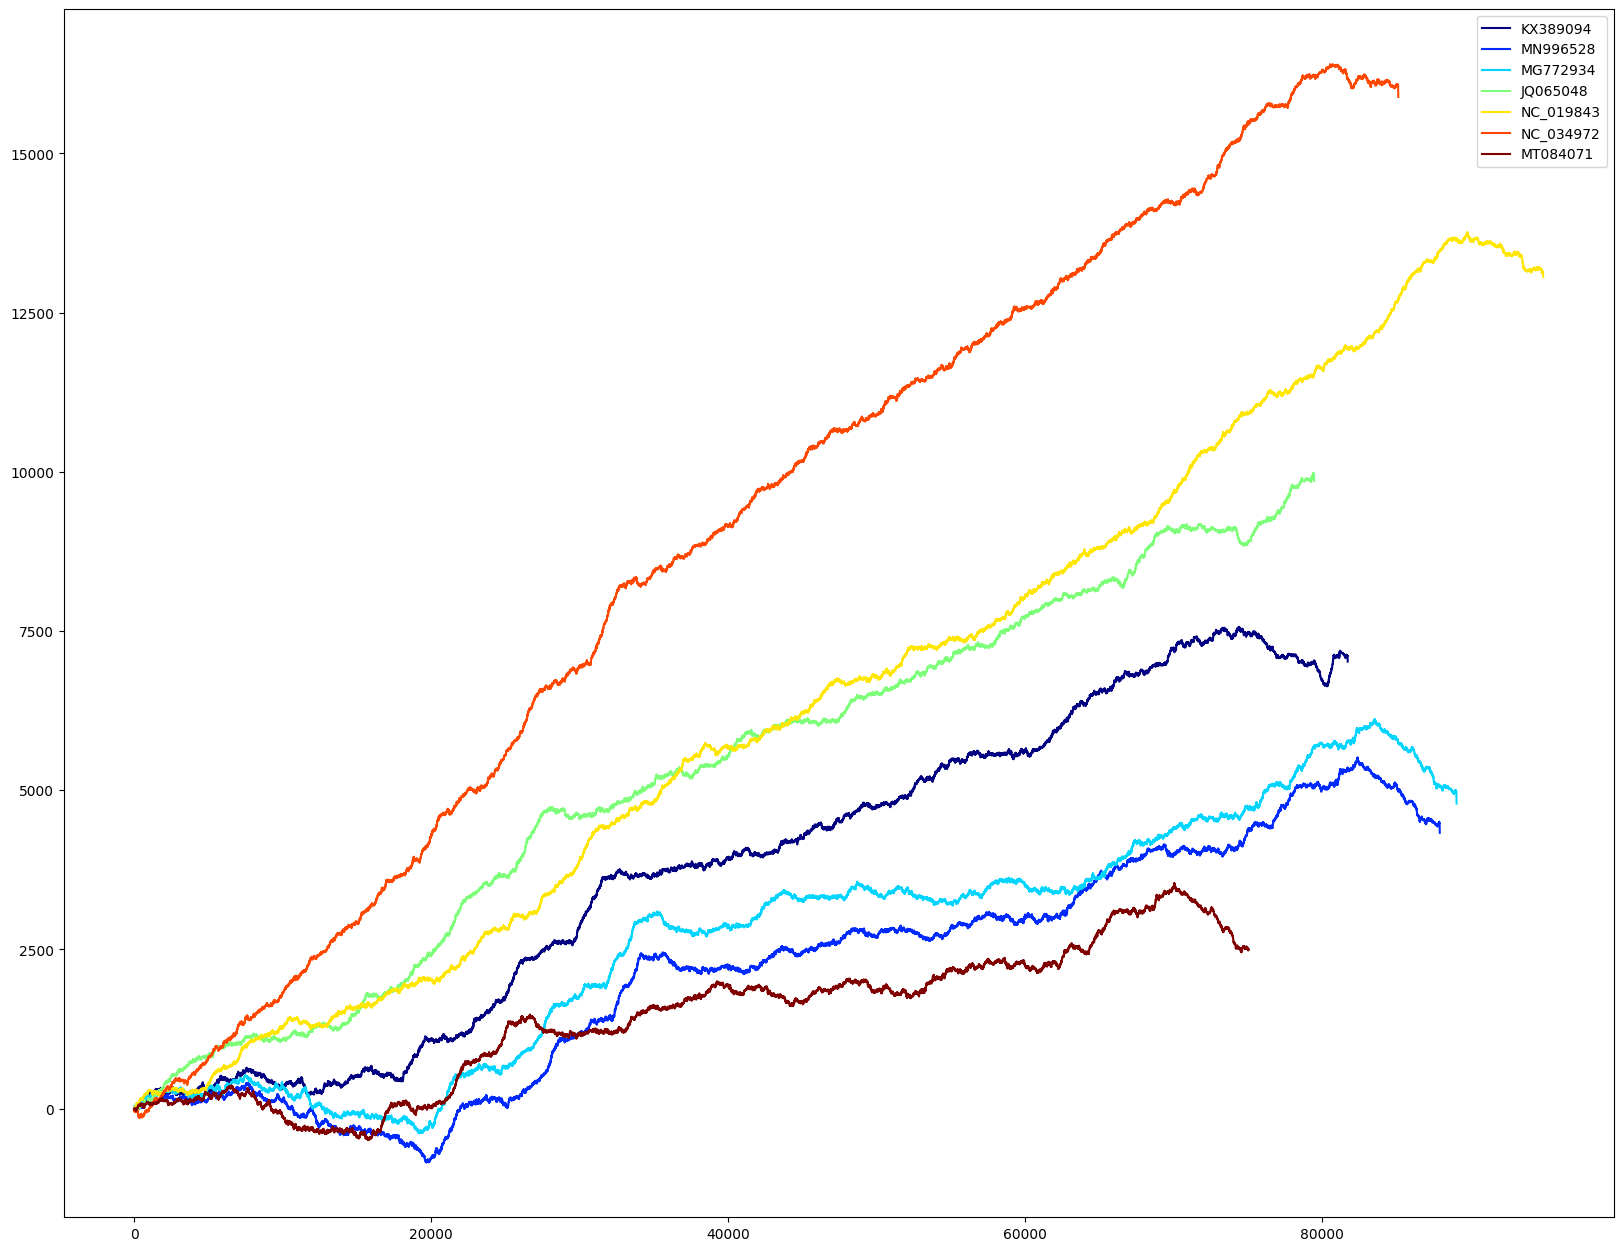

<Figure size 432x288 with 0 Axes>

In [36]:
n = len(seq_names_different_hosts)
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1.0, n))
figure(figsize=(20,16), dpi=100)

for seq_name, color in zip(seq_names_different_hosts, colors):
  x_column_name = 'x_' + seq_name
  y_column_name = 'y_' + seq_name
  x_vector = df_different_hosts_coordinates[x_column_name]
  y_vector = df_different_hosts_coordinates[y_column_name]
  plt.plot(x_vector, y_vector, label=seq_name, color=color)
plt.legend(loc = 'best')
plt.show()
plt.savefig("/content/drive/My Drive/DSinLS20/week11/code/output/2D_curves_different_hosts.png")